<a href="https://colab.research.google.com/github/JigsAwesome/AI-ML-in-Oil-Gas/blob/main/Permeability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
upoaded=files.upload()


Saving Pt.csv to Pt.csv


In [ ]:
df = pd.read_csv('Pt.csv')
df

,time,pressure
0,0.0010,2743.96
1,0.0021,2737.52
2,0.0034,2730.16
3,0.0048,2722.32
4,0.0064,2713.83
...,...,...
73,48.7900,2269.77
74,54.7900,2267.69
75,60.7900,2265.73
76,66.7900,2264.46


Text(0.5, 1.0, 'Cartesian plot : Drawdown test')

<Figure size 1200x400 with 0 Axes>

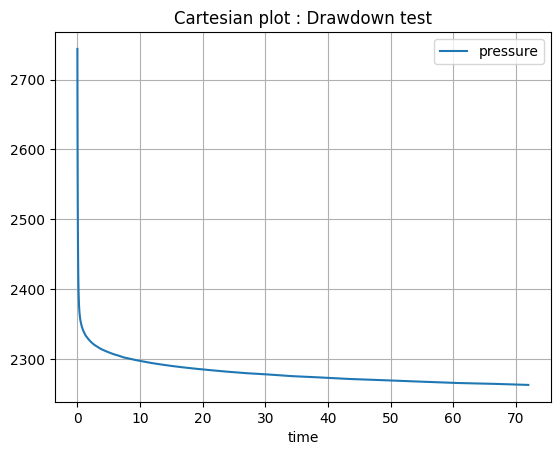

In [ ]:
plt.style.use('default')
plt.figure(figsize=(12,4))
df.plot( y='pressure', x='time')
plt.grid()
plt.title('Cartesian plot : Drawdown test')



Text(0.5, 1.0, 'Semilog plot : Drawdown test')

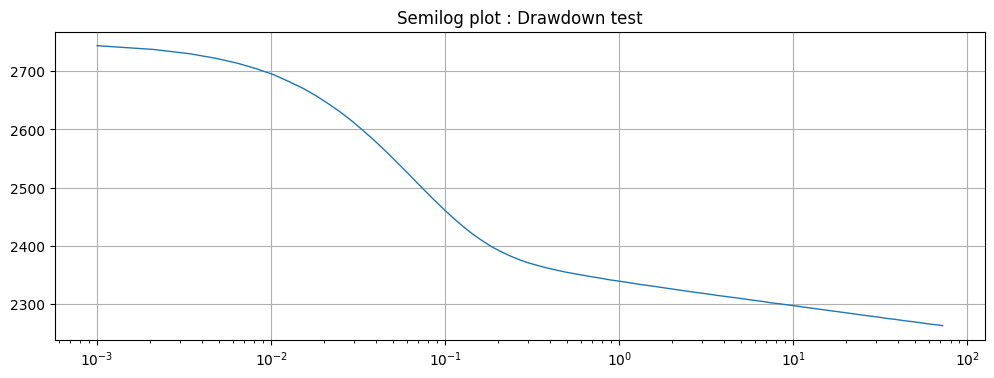

In [ ]:
plt.style.use('default')
plt.figure(figsize=(12,4))
plt.semilogx(df['time'], df['pressure'], lw=1 )
plt.grid()
plt.title('Semilog plot : Drawdown test')


In [ ]:
import numpy as np

pi=2760 #psi
df['delP']=np.abs(pi-df['pressure'])
df['d(delP)']=np.zeros(len(df))
df['d(delP)'].iloc[1:] = np.abs(np.diff(df['delP']))
df['d(delP)'].iloc[1:] 
df['dt']=np.zeros(len(df))
df['dt'].iloc[1:]=np.diff(df['time'])
df['dt'].iloc[1:]
#p'=t*dp/dt
df['Pdash']= np.zeros(len(df))
df['Pdash'].iloc[:]=df['time']*(df['d(delP)']/df['dt'])

df.head()

,time,pressure,delP,d(delP),dt,Pdash
0,0.0010,2743.96,16.04,0.00,0.0000,NaN
1,0.0021,2737.52,22.48,6.44,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,0.0016,33.960000


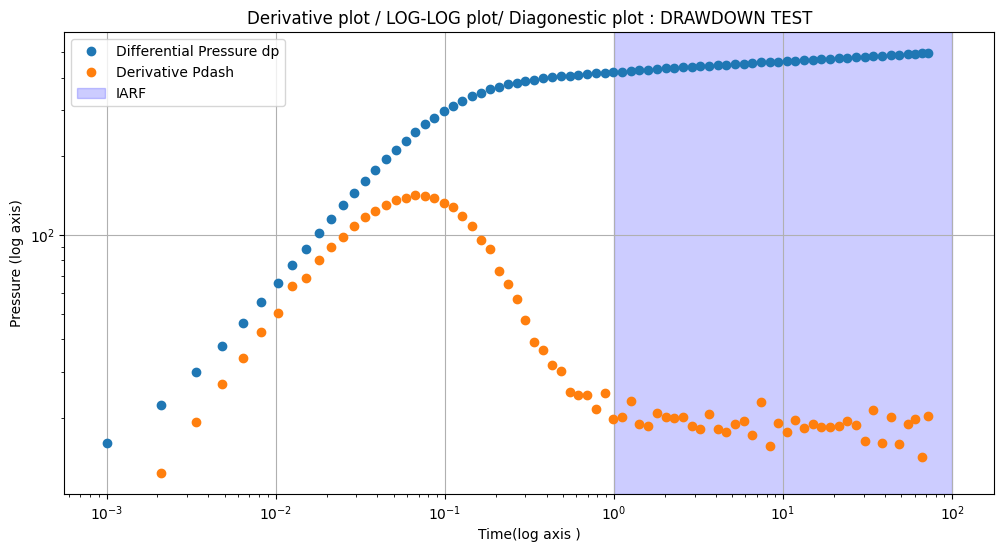

In [ ]:
plt.style.use('default')
plt.figure(figsize=(12,6))
plt.loglog(df['time'], df['delP'],'o', label='Differential Pressure dp')
plt.loglog(df['time'], df['Pdash'],'o', label = 'Derivative Pdash')
plt.xlabel('Time(log axis )')
plt.ylabel('Pressure (log axis)')
plt.title('Derivative plot / LOG-LOG plot/ Diagonestic plot : DRAWDOWN TEST')
plt.axvspan(1,100, color= 'blue', alpha = 0.2 , label = 'IARF')
plt.grid()
plt.legend ( )  

In [ ]:
from pandas.core.tools.times import time
from sklearn import linear_model
from sklearn.model_selection import train_test_split 
model= linear_model.LinearRegression()





In [ ]:
import seaborn as sns
plt.loglog(df['time'], df['Pdash[10,10^2]'],'o', label = 'Derivative Pdash')
sns.lmplot(df['time'], df['Pdash'], data = df  )



KeyError: ignored

In [ ]:
ndf= df.drop('time', axis= 'columns')
ndf1= ndf.fillna(0)
plt.xlim(10,10^2)
ndf1

NameError: ignored

In [ ]:
df1 = df.fillna(0)
df1

,time,pressure,delP,d(delP),dt,Pdash
0,0.0010,2743.96,16.04,0.00,0.0000,0.000000
1,0.0021,2737.52,22.48,6.44,0.0011,12.294545
2,0.0034,2730.16,29.84,7.36,0.0013,19.249231
3,0.0048,2722.32,37.68,7.84,0.0014,26.880000
4,0.0064,2713.83,46.17,8.49,0.0016,33.960000
...,...,...,...,...,...,...
73,48.7900,2269.77,490.23,1.77,5.4200,15.933266
74,54.7900,2267.69,492.31,2.08,6.0000,18.993867
75,60.7900,2265.73,494.27,1.96,6.0000,19.858067
76,66.7900,2264.46,495.54,1.27,6.0000,14.137217


In [ ]:
model= linear_model.LinearRegression()
model.fit(ndf1 ,df1.Pdash)

LinearRegression()

In [ ]:
model.coef_

array([ 4.20876371e-03,  4.20876371e-03,  4.11346304e-16, -9.58976822e-17,
        1.00000000e+00])